Fuente donde se obtuvieron los datos:
https://www.statlearning.com/

Donde se empleo el libro en Python

In [ ]:
import numpy as np
import pandas as pd
from ISLP import load_data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


NCI60 = load_data('NCI60')
nc_data = NCI60['data']
nc_lables = NCI60['labels']

# Compruebo que los datos están correctos
print(f"Dimensiones: {nc_data.shape}")
nc_lables.value_counts()



Dimensiones: (64, 6830)


label      
RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7D-repro    1
MCF7A-repro    1
UNKNOWN        1
Name: count, dtype: int64

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
nc_scaled = scaler.fit_transform(nc_data)
# PCA
pca = PCA()
principal_components = pca.fit_transform(nc_scaled)



Media de los datos estandarizados: 2.7755575615628914e-17
Desviacion estándar de los datos estandarizados: 0.9999999999999999

Forma de los componentes principales: (64, 64)


## ¿Cuál es el porcentaje de la varianza explicada considerando las principales 10 componentes?

In [22]:
exp_var = pca.explained_variance_ratio_

# Esto es para saber la cantidad de varianza de los 10 primeros componentes
variance_first_10 = np.sum(exp_var[:10])

print(f"Varianza para los primeras 10 componentes: {variance_first_10:.4f}")
print(f"Porcentaje de varianza: {variance_first_10 * 100:.2f}%")

Varianza para los primeras 10 componentes: 0.4613
Porcentaje de varianza: 46.13%



## ¿Cuántas componentes principales debemos considerar para obtener el 92% de la variabilidad explicada?

In [42]:
cumulative_variance = np.cumsum(exp_var)

# busco cuantos componentes necesito para llegar al 92% de varianza
components_92 = np.where(cumulative_variance >= 0.92)[0][0] + 1

print(f"Número de componentes para alcanzar 92% de varianza: {components_92}")

# Verifico que sea verdad
print(f"Varianza acumulada con {components_92} componentes: {cumulative_variance[components_92-1] * 100:.2f}%")



Número de componentes para alcanzar 92% de varianza: 47
Varianza acumulada con 47 componentes: 92.66%


Con esos datos realizo una grafica de la varianza acumulada para poder visualizar mejor el cambio a medida que se agregan componentes.

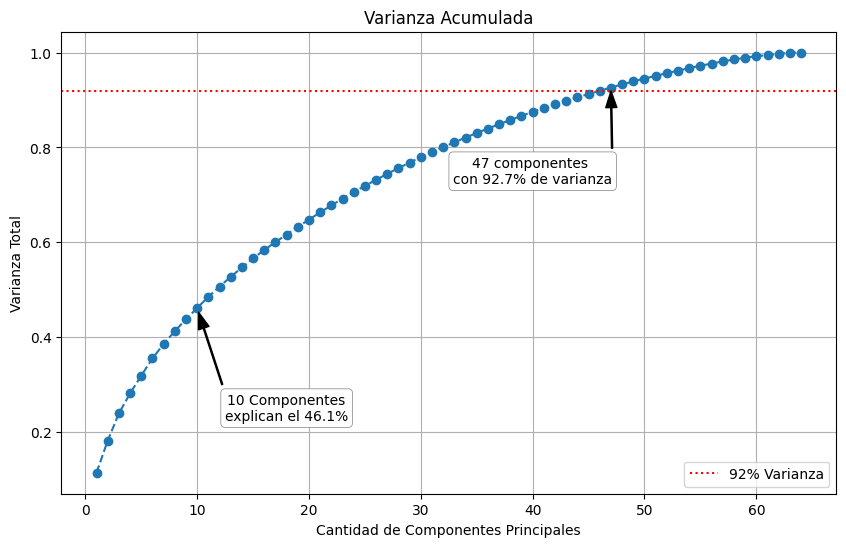

In [53]:
var_at_10_comp = cumulative_variance[9] 
var_at_92_comp = cumulative_variance[components_92 - 1]
comp_at_92_var = components_92 
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.92, color='red', linestyle=':', label='92% Varianza')
plt.annotate(f'{comp_at_92_var} componentes \ncon {var_at_92_comp*100:.1f}% de varianza', 
             xy=(comp_at_92_var, var_at_92_comp), 
             xytext=(comp_at_92_var - 7, 0.75), 
             arrowprops=dict(facecolor='black', shrink=0.05, width=0.8, headwidth=8),
             ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5))
plt.annotate(f'10 Componentes\nexplican el {var_at_10_comp*100:.1f}%', 
             xy=(10, var_at_10_comp), 
             xytext=(18, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05, width=0.8, headwidth=8),
             ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5))

# --- Limpieza final ---
plt.title('Varianza Acumulada')
plt.xlabel('Cantidad de Componentes Principales')
plt.ylabel('Varianza Total')
plt.legend(loc='lower right') 
plt.grid(True)
plt.show()